# Dependencies

In [1]:
import os.path as osp
import sys

root_dir = osp.abspath(osp.join(osp.dirname(osp.realpath(osp.abspath(""))), "."))
source_dir = osp.join(root_dir, "src")
print(source_dir)
sys.path.append(root_dir)
sys.path.append(source_dir)

/home/eitomiyamura/Github/Fuma_Fuzz/src


In [2]:
from utils import get_bytecode, compile_dir
from dotmap import DotMap

# Load Compiled Contract JSONs


In [3]:
args = {
    "version":  "0.4.21",
    "optimize": True,
    "recompile": False,
    "source": "data/data_analysis"
}
args = DotMap(args)

In [5]:
compiled_jsons = compile_dir(args, root_dir)
# print(compiled_jsons)

# Graphs


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("paper")

## ABI

### Function & Contract Count

,contract_per_sourcecode,functions_per_contract,state_mutability
0,5,42,view
1,5,10,view
2,5,1,view
3,5,3,view
4,5,0,view
...,...,...,...
5740,6,17,view
5741,6,3,view
5742,6,21,view
5743,6,0,view


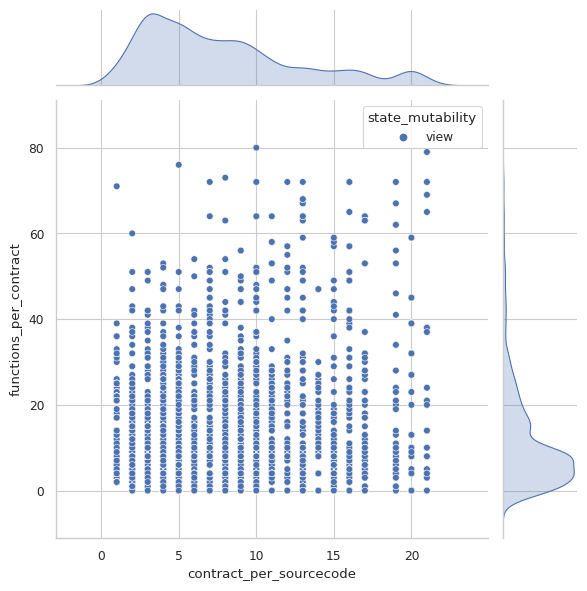

In [46]:
df = pd.DataFrame(columns=['contract_per_sourcecode', 'functions_per_contract', 'state_mutability'])

# upper_bound = {"contract_per_sourcecode": 10, "functions_per_contract": 20}
upper_bound = {"contract_per_sourcecode": 100, "functions_per_contract": 200}


func_count = 0
for compiled_json in enumerate(compiled_jsons):
    contract_per_sourcecode = len(compiled_json[1])
    if contract_per_sourcecode > upper_bound["contract_per_sourcecode"]:
        continue
    # print(compiled_json[1])
    for ctrct_name, ctrct in compiled_json[1].items():
        function_mutability_count = {}
        functions_per_contract = len(ctrct["abi"])
        if functions_per_contract > upper_bound["functions_per_contract"]:
            continue
        
        df.loc[func_count] = [contract_per_sourcecode, functions_per_contract, "view"]
        func_count += 1

sns.jointplot(data=df, x="contract_per_sourcecode", y="functions_per_contract", hue="state_mutability")
df

### Functions by state mutability

,contract_per_sourcecode,per_contract,state_mutability
0,5,19,view
1,5,18,nonpayable
2,5,2,payable
3,5,4,nonpayable
4,5,4,view
...,...,...,...
10976,6,1,payable
10977,6,10,view
10978,6,8,nonpayable
10979,6,10,view


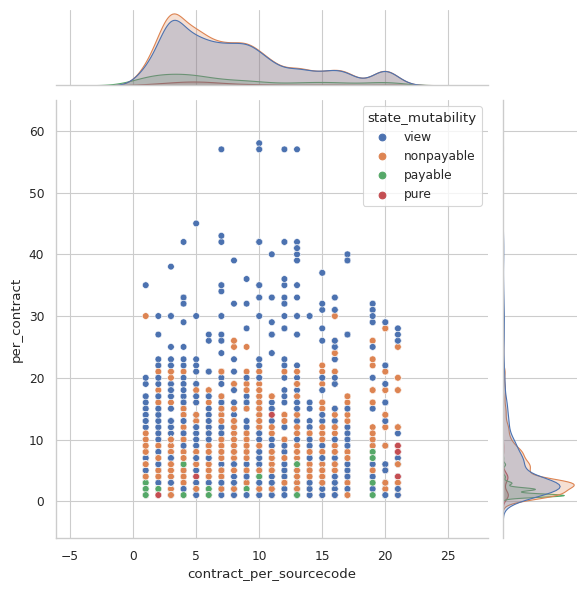

In [47]:
from collections import Counter

df2 = pd.DataFrame(columns=['contract_per_sourcecode', 'per_contract', 'state_mutability'])

func_count = 0
for compiled_json in enumerate(compiled_jsons):
    contract_per_sourcecode = len(compiled_json[1])
    for ctrct_name, ctrct in compiled_json[1].items():
        
        state_mut_type = []
        for func in ctrct["abi"]:
            # print(func)
            if "stateMutability" in func:
                state_mut_type.append(func["stateMutability"])
        state_mut_counter = Counter(state_mut_type)

        for state_mut, state_mut_cnt in state_mut_counter.items():
            df2.loc[func_count] = [contract_per_sourcecode, state_mut_cnt, state_mut]
            func_count += 1

sns.jointplot(data=df2, x="contract_per_sourcecode", y="per_contract", hue="state_mutability")
df2

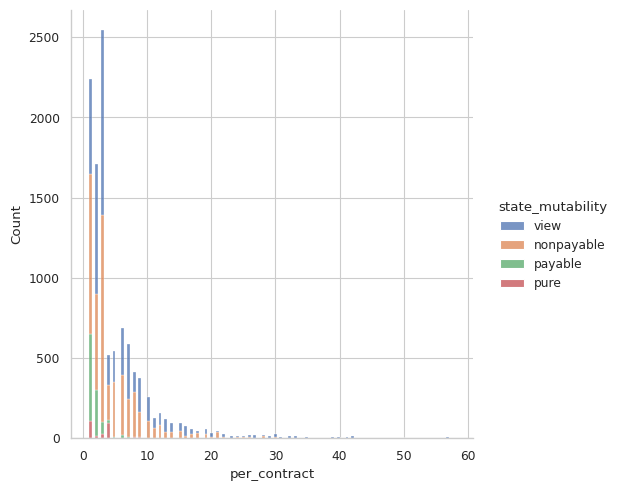

In [44]:

sns.displot(data=df2, x="per_contract",hue="state_mutability", multiple="stack")
